In [1]:
import warnings
warnings.simplefilter("ignore")

# linear algebra Library
import numpy as np 

# data processing
import pandas as pd 

# Plotting graphs Libraries
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Import tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## Problem 1
### 1.	Perform Data exploratory analysis on the data 

In [2]:
# Read data 
data = pd.read_csv("/Users/chitra/Documents/Subjects/Analytic Python/assignment/assgnmnt5/breastcancer.csv")

In [3]:
#check data 
data.head(3)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1


In [4]:
#checking data types of data
data.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

In [5]:
#making classification as a category tyoe
data["Classification"] = data["Classification"].astype("category")

In [6]:
# rechecking data
data.dtypes

Age                  int64
BMI                float64
Glucose              int64
Insulin            float64
HOMA               float64
Leptin             float64
Adiponectin        float64
Resistin           float64
MCP.1              float64
Classification    category
dtype: object

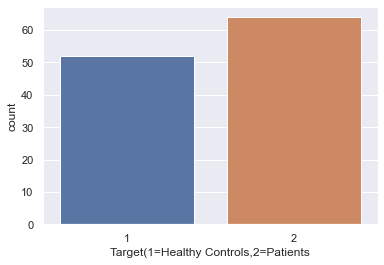

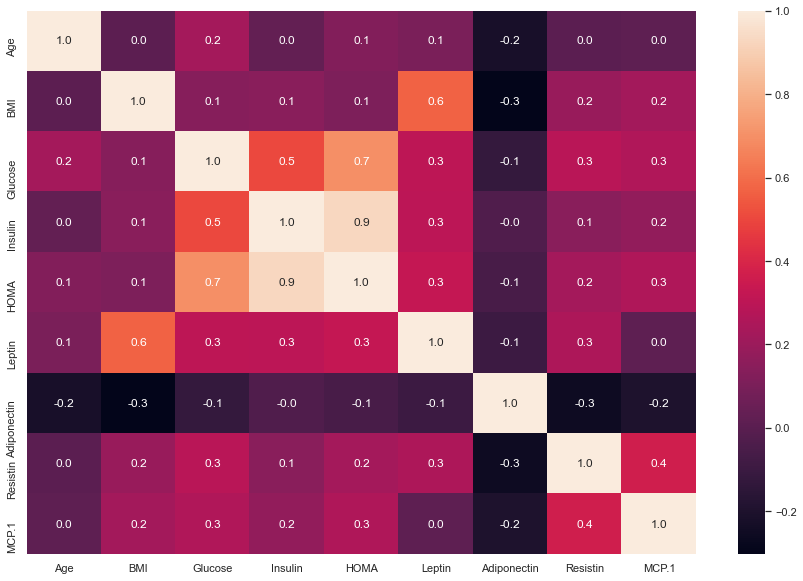

In [7]:
# plptting bar plot for classification and heatmap to check the correlation in data
data.Classification.value_counts()
sns.countplot(x="Classification",data=data)
plt.xlabel("Target(1=Healthy Controls,2=Patients")
plt.show()
print("")
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt=".1f")
plt.show()

### The data is not imbalanced

In [8]:
#checking for null in data 
data.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

##
### There are no missing values

In [9]:
data.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [10]:
# desribing data below
print(data.nunique(axis=0))
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

Age                51
BMI               110
Glucose            50
Insulin           113
HOMA              116
Leptin            116
Adiponectin       115
Resistin          116
MCP.1             113
Classification      2
dtype: int64


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000


In [11]:
# checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             116 non-null    int64   
 1   BMI             116 non-null    float64 
 2   Glucose         116 non-null    int64   
 3   Insulin         116 non-null    float64 
 4   HOMA            116 non-null    float64 
 5   Leptin          116 non-null    float64 
 6   Adiponectin     116 non-null    float64 
 7   Resistin        116 non-null    float64 
 8   MCP.1           116 non-null    float64 
 9   Classification  116 non-null    category
dtypes: category(1), float64(7), int64(2)
memory usage: 8.5 KB


In [12]:
# checking size of data
data.shape

(116, 10)

In [13]:
data.quantile()

Age             56.000000
BMI             27.662416
Glucose         92.000000
Insulin          5.924500
HOMA             1.380939
Leptin          20.271000
Adiponectin      8.352692
Resistin        10.827740
MCP.1          471.322500
Name: 0.5, dtype: float64

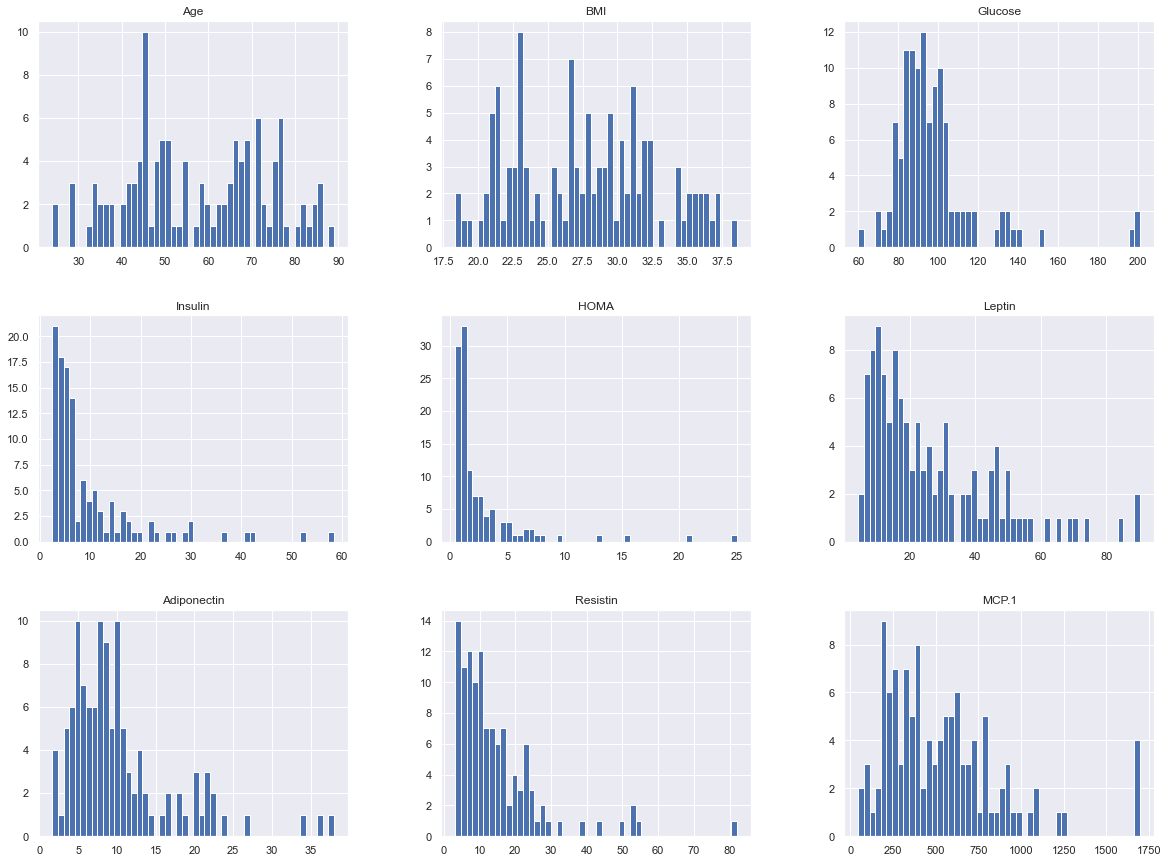

In [14]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

### What is the relationship between HOMA and Insulin?

Text(0, 0.5, 'Price')

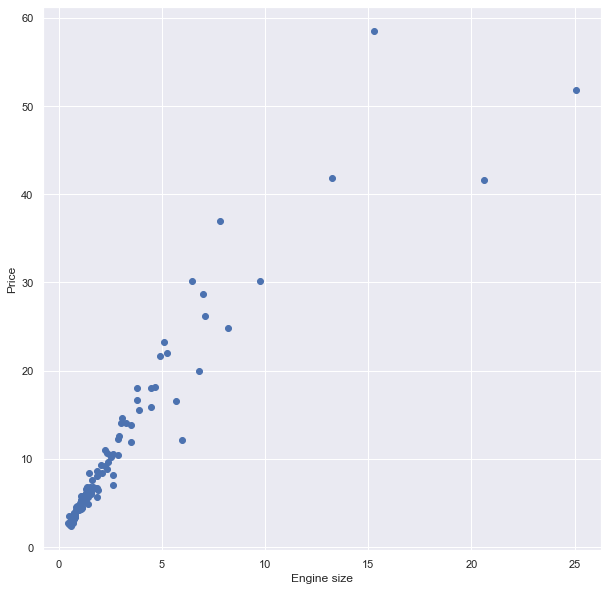

In [15]:
# let's plot scatter plot to check the relationship
plt.figure(figsize=(10,10))
plt.scatter(x='HOMA',y='Insulin',data=data)
plt.xlabel('Engine size')
plt.ylabel('Price')

There seems to be a positive linear correlation

### What is the relation between HOMA and Glucose?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='HOMA', ylabel='Glucose'>

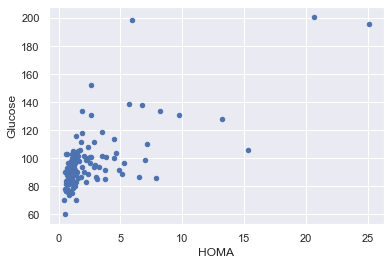

In [16]:
data.plot(kind='scatter', x='HOMA', y='Glucose')

There seems to be slight positive linear correlation

In [17]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

Age : [48 83 82 68 86 49 89 76 73 75 34 29 25 24 38 44 47 61 64 32 36 35 54 45
 50 66 53 28 43 51 67 69 60 77 71 78 85 42 62 59 46 72 55 41 81 65 58 40
 52 74 57]
BMI : [23.5        20.69049454 23.12467037 21.36752137 21.11111111 22.85445769
 22.7        23.8        22.         23.         21.47       23.01
 22.86       18.67       23.34       20.76       22.03       32.03895937
 34.5297228  36.51263743 28.57667585 31.97501487 32.27078777 30.27681661
 30.48315806 37.03560819 38.57875854 31.44654088 35.2507611  34.17489
 36.21227888 36.7901662  35.85581466 34.42217362 27.68877813 29.60676726
 31.2385898  35.09270153 26.34929208 35.58792924 29.2184076  27.2
 27.3        32.5        30.3        27.7        25.7        25.3
 29.4        26.6        27.1        25.9        21.30394858 20.82999519
 20.9566075  24.24242424 21.35991456 21.08281329 19.13265306 22.65625
 22.4996371  21.51385851 22.89281998 22.83287935 23.14049587 24.21875
 22.22222222 20.83       19.56       20.26       24.74   

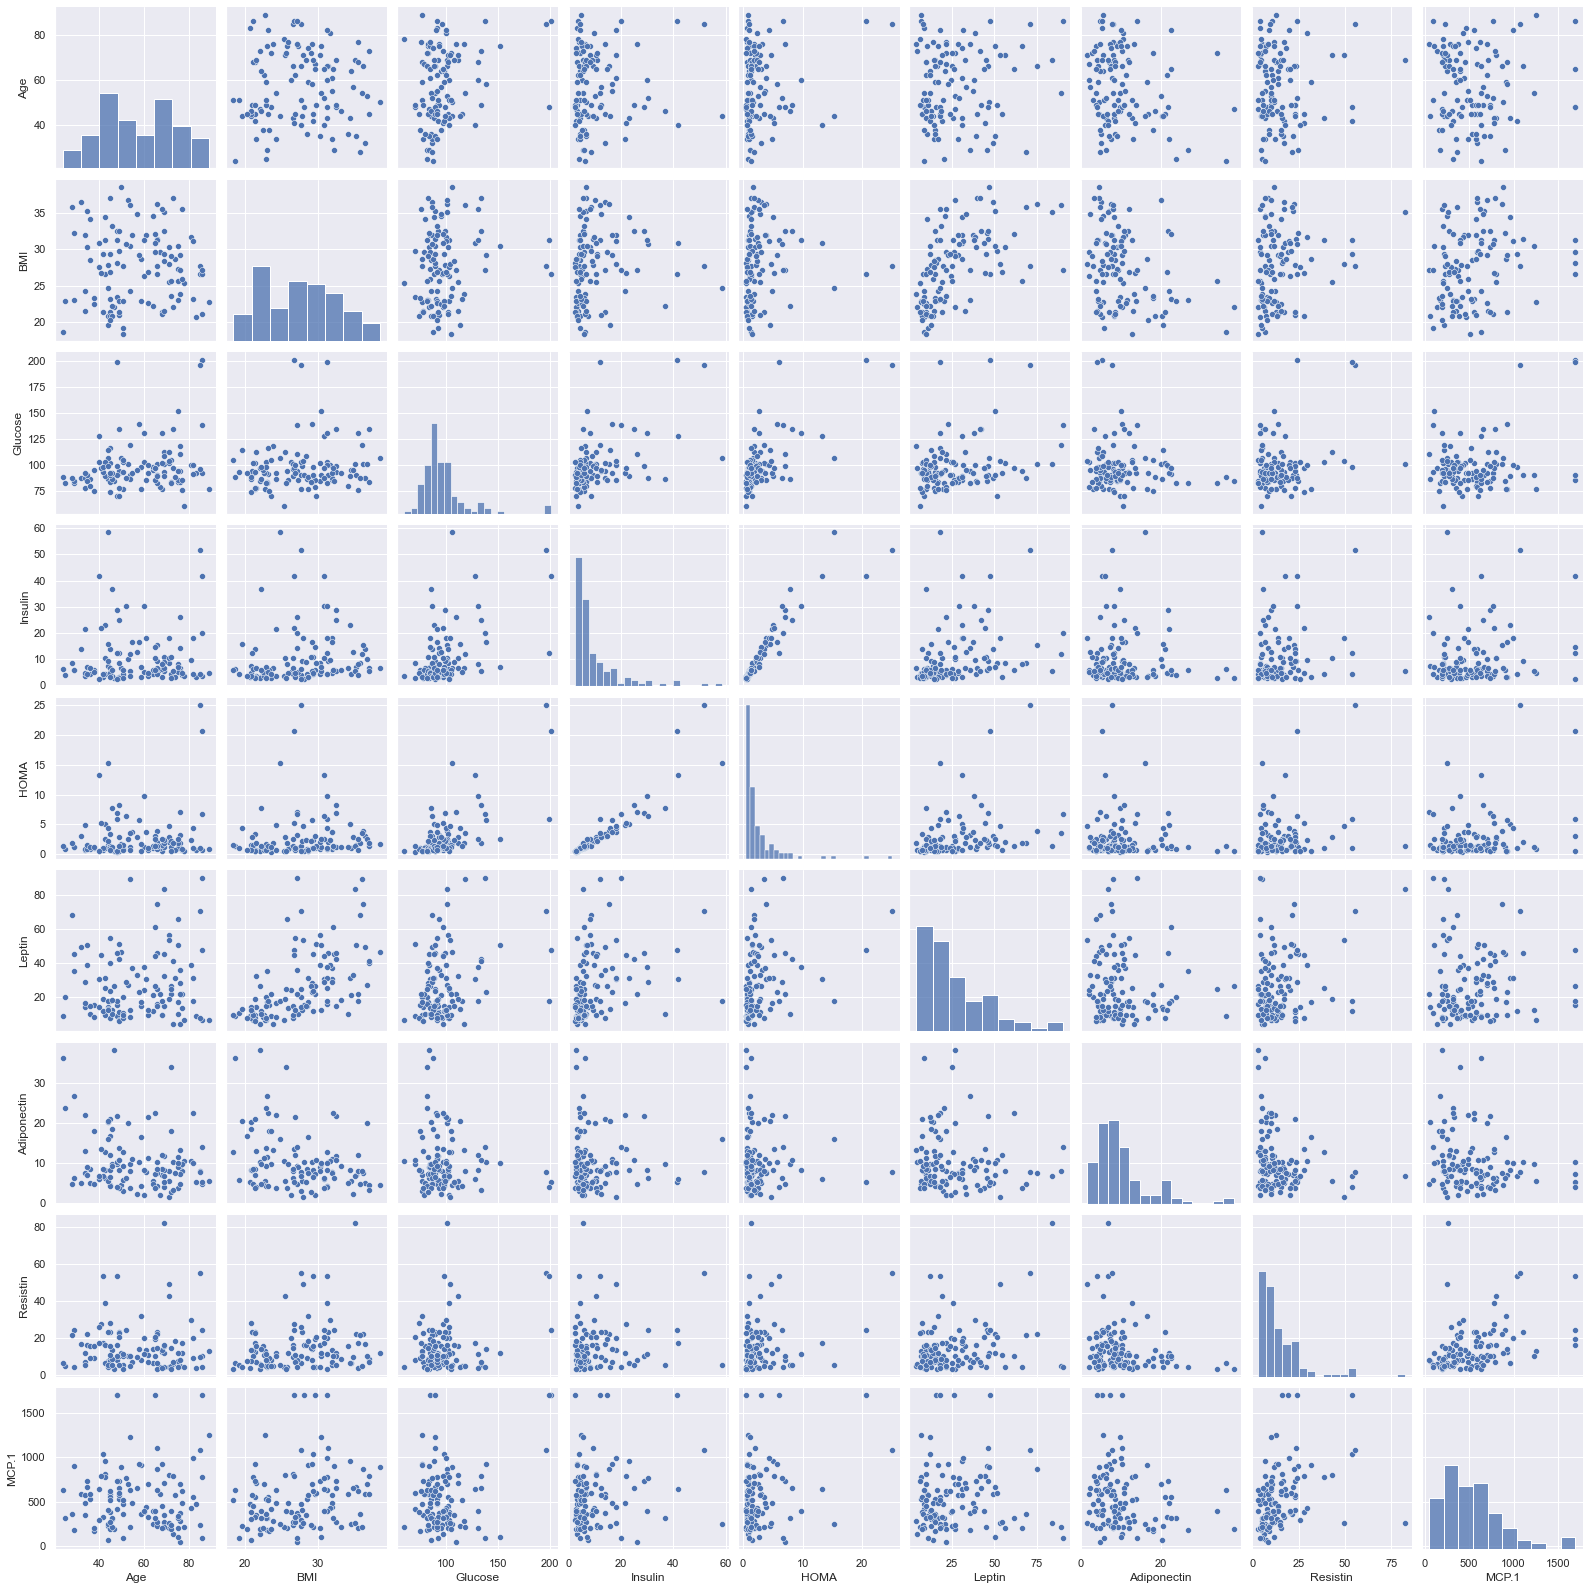

In [18]:
# printing pairplot
sns.pairplot(data)

<AxesSubplot:>

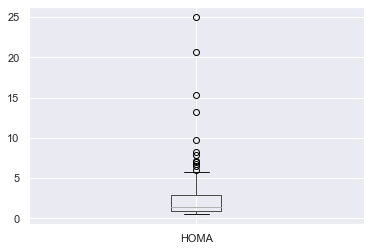

In [19]:
# boxplot on HOMA 
data.boxplot("HOMA")

<AxesSubplot:>

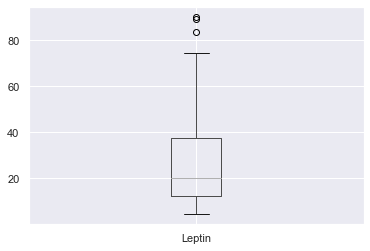

In [20]:
# boxplot on Leptin 
data.boxplot("Leptin")

Performing analysis with the detected outliers as it is

In [21]:
from sklearn.preprocessing import MinMaxScaler
# recaling the variables (both)
df_columns = data.columns
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# rename columns (since now its an np array)
data = pd.DataFrame(data)
data.columns = df_columns

data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,0.369231,0.253850,0.070922,0.004908,0.000000,0.052299,0.221152,0.060665,0.224659,0.0
1,0.907692,0.114826,0.226950,0.012190,0.009742,0.052726,0.103707,0.010826,0.255926,0.0
2,0.892308,0.235278,0.219858,0.036874,0.022058,0.158526,0.571021,0.076906,0.307912,0.0
3,0.676923,0.148328,0.120567,0.014171,0.005911,0.064811,0.151538,0.121131,0.533934,0.0
4,0.953846,0.135640,0.226950,0.019936,0.013748,0.027782,0.086940,0.093375,0.440565,0.0


## Use 30% of data as the test set and build following models to predict Labels variable                      

In [22]:
# splitting data into train and test in 70:30 ratio
y = data["Classification"]
X = data.drop("Classification",axis=1)
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size=0.3, random_state=23)

In [23]:
y.nunique()

2

In [24]:
# print shape and train data
print(X_train.shape)
X_train.head()

(81, 9)


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
11,0.076923,0.229603,0.156028,0.057668,0.027581,0.363840,0.688874,0.017366,0.078033
81,0.876923,0.656664,0.283688,0.129168,0.078006,0.401256,0.246826,0.333988,0.230142
61,0.692308,0.155569,0.368794,0.075873,0.056091,0.328828,0.068217,0.158306,0.403847
44,0.723077,0.590338,0.297872,0.105447,0.066344,0.607091,0.177935,0.013803,0.093872
8,0.753846,0.179625,0.262411,0.016385,0.013592,0.001850,0.239191,0.038971,0.055072


### 2 (a) Building a Model using Naive Bayes Classfier

In [25]:
# building Naive bayes model
model_NaiveBayes = GaussianNB()
model_NaiveBayes.fit(X_train, y_train)
y_pred = model_NaiveBayes.predict(X_test)

In [26]:
# printing result metrics
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6571428571428571


In [27]:
# creating new data dropping HOMA
X_noHoma_train = X_train.drop("HOMA",axis =1)
X_noHoma_test = X_test.drop("HOMA",axis =1)

In [28]:
# check data
X_noHoma_train.head(3)

,Age,BMI,Glucose,Insulin,Leptin,Adiponectin,Resistin,MCP.1
11,0.076923,0.229603,0.156028,0.057668,0.363840,0.688874,0.017366,0.078033
81,0.876923,0.656664,0.283688,0.129168,0.401256,0.246826,0.333988,0.230142
61,0.692308,0.155569,0.368794,0.075873,0.328828,0.068217,0.158306,0.403847


In [29]:
# predicting model without HOMA
model_NaiveBayes.fit(X_noHoma_train, y_train)
y_pred_noHoma = model_NaiveBayes.predict(X_noHoma_test)

In [30]:
# show model metrics
print("Accuracy:",accuracy_score(y_test, y_pred_noHoma))

Accuracy: 0.6285714285714286


In [31]:
# prediction results
y_pred

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1.])

In [32]:
# show model metrics
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6571428571428571


The accuracy does not imrpove if we remove the column named HOMA

In [33]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score

#Check Accuracy precision, recall, f1-score
print( classification_report(y_test, model_NaiveBayes.predict(X_noHoma_test)) )


              precision    recall  f1-score   support

         0.0       0.53      0.57      0.55        14
         1.0       0.70      0.67      0.68        21

    accuracy                           0.63        35
   macro avg       0.62      0.62      0.62        35
weighted avg       0.63      0.63      0.63        35



In [34]:
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(y_test, model_NaiveBayes.predict(X_noHoma_test)))
print(F'Precision:', precision_score(y_test, model_NaiveBayes.predict(X_noHoma_test)))
print(F'Recall:', recall_score(y_test,  model_NaiveBayes.predict(X_noHoma_test)))
print(F'F1 Score:', f1_score(y_test,  model_NaiveBayes.predict(X_noHoma_test)))


Accuracy: 0.6285714285714286
Precision: 0.7
Recall: 0.6666666666666666
F1 Score: 0.6829268292682926


## 2 (b) Modelling using Decission Tree Classifier

In [35]:
# fir the model 
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)
pred_dt = dt.predict(X_test)

In [36]:
# show model metrics
print("Accuracy:",accuracy_score(y_test, pred_dt))

Accuracy: 0.7714285714285715


In [37]:
# show predicted result
pred_dt

array([1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1.])

In [38]:
#Check Accuracy precision, recall, f1-score
print( classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71        14
         1.0       0.81      0.81      0.81        21

    accuracy                           0.77        35
   macro avg       0.76      0.76      0.76        35
weighted avg       0.77      0.77      0.77        35



In [39]:
print(F'Accuracy:',accuracy_score(y_test, pred_dt))
print(F'Precision:', precision_score(y_test, pred_dt))
print(F'Recall:', recall_score(y_test, pred_dt))
print(F'F1 Score:', f1_score(y_test,  pred_dt))

Accuracy: 0.7714285714285715
Precision: 0.8095238095238095
Recall: 0.8095238095238095
F1 Score: 0.8095238095238095
